In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


2.0.0-rc0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
processedlist = []

# Phone Accel Data

for i in range(1,21,1):
    b = 1599+i
    filei = open('raw/train/phone/accel/data_'+str(b)+'_accel_phone.txt')
    linesi = filei.readlines()
    for ai, linei in enumerate(linesi):
        try:
            linei = linei.split(',')
            lasti = linei[5].split(';')[0]
            lasti = lasti.strip()
            if lasti == '':
                break;
            tempi = [linei[0], linei[1], linei[2], linei[3], linei[4], lasti]
            processedlist.append(tempi)
        except:
            print("Error at line number: ", ai)


In [6]:
# Phone Gyro Data

for j in range(1,21,1):
    c = 1599+j
    gfilej = open('raw/train/phone/gyro/data_'+str(c)+'_gyro_phone.txt')
    glinesj = gfilej.readlines()
    for gaj, glinej in enumerate(glinesj):
        try:
            glinej = glinej.split(',')
            glastj = glinej[5].split(';')[0]
            glastj = glastj.strip()
            if glastj == '':
                break;
            gtempj = [glinej[0], glinej[1], glinej[2], glinej[3], glinej[4], glastj]
            processedlist.append(gtempj)
        except:
            print("Error at line number: ", gaj)

In [7]:
# Watch Accel Data

for k in range(1,21,1):
    d = 1599+k
    filewk = open('raw/train/watch/accel/data_'+str(d)+'_accel_watch.txt')
    lineswk = filewk.readlines()
    for awk, linewk in enumerate(lineswk):
        try:
            linewk = linewk.split(',')
            lastwk = linewk[5].split(';')[0]
            lastwk = lastwk.strip()
            if lastwk == '':
                break;
            tempwk = [linewk[0], linewk[1], linewk[2], linewk[3], linewk[4], lastwk]
            processedlist.append(tempwk)
        except:
            print("Error at line number: ", awk)

In [8]:
# Watch Gyro Data

for l in range(1,21,1):
    e = 1599+l
    gfilewl = open('raw/train/watch/gyro/data_'+str(e)+'_gyro_watch.txt')
    glineswl = gfilewl.readlines()
    for gawl, glinewl in enumerate(glineswl):
        try:
            glinewl = glinewl.split(',')
            glastwl = glinewl[5].split(';')[0]
            glastwl = glastwl.strip()
            if glastwl == '':
                break;
            gtempwl = [glinewl[0], glinewl[1], glinewl[2], glinewl[3], glinewl[4], glastwl]
            processedlist.append(gtempwl)
        except:
            print("Error at line number: ", gawl)

In [6]:
processedlist

[['1600', 'A', '252207666810782', '-0.36476135', '8.793503', '1.0550842'],
 ['1600', 'A', '252207717164786', '-0.8797302', '9.768784', '1.0169983'],
 ['1600', 'A', '252207767518790', '2.0014954', '11.10907', '2.619156'],
 ['1600', 'A', '252207817872794', '0.45062256', '12.651642', '0.18455505'],
 ['1600', 'A', '252207868226798', '-2.1643524', '13.928436', '-4.4224854'],
 ['1600', 'A', '252207918580802', '-4.332779', '13.361191', '-0.7188721'],
 ['1600', 'A', '252207968934806', '-0.31944275', '13.318359', '-0.23202515'],
 ['1600', 'A', '252208019288809', '1.566452', '9.515274', '-0.01777649'],
 ['1600', 'A', '252208069642813', '-0.32374573', '5.262665', '0.32234192'],
 ['1600', 'A', '252208119996817', '-1.811676', '3.7105103', '1.3739319'],
 ['1600', 'A', '252208170350821', '-1.1340485', '4.538269', '2.2975464'],
 ['1600', 'A', '252208220704825', '0.09291077', '6.7061005', '1.8996277'],
 ['1600', 'A', '252208271058829', '-1.0363159', '15.611984', '2.6415253'],
 ['1600', 'A', '2522083214

In [9]:
columns = ['User', 'Activity', 'Time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedlist, columns = columns)

In [10]:
data

,User,Activity,Time,x,y,z
0,1600,A,252207666810782,-0.36476135,8.793503,1.0550842
1,1600,A,252207717164786,-0.8797302,9.768784,1.0169983
2,1600,A,252207767518790,2.0014954,11.10907,2.619156
3,1600,A,252207817872794,0.45062256,12.651642,0.18455505
4,1600,A,252207868226798,-2.1643524,13.928436,-4.4224854
5,1600,A,252207918580802,-4.332779,13.361191,-0.7188721
6,1600,A,252207968934806,-0.31944275,13.318359,-0.23202515
7,1600,A,252208019288809,1.566452,9.515274,-0.01777649
8,1600,A,252208069642813,-0.32374573,5.262665,0.32234192
9,1600,A,252208119996817,-1.811676,3.7105103,1.3739319


In [9]:
data.shape

(5575010, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575010 entries, 0 to 5575009
Data columns (total 6 columns):
User        object
Activity    object
Time        object
x           object
y           object
z           object
dtypes: object(6)
memory usage: 255.2+ MB


In [11]:
data.isnull().sum()

User        0
Activity    0
Time        0
x           0
y           0
z           0
dtype: int64

In [9]:
data['Activity'].value_counts()

P    326432
M    322790
K    319861
A    316410
L    316264
H    315551
I    312049
C    310189
O    309299
J    307813
S    306874
D    305053
Q    305052
E    304954
R    304814
G    304798
F    297731
B    289076
Name: Activity, dtype: int64

In [11]:
###converting x, y, and z into float type

data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575010 entries, 0 to 5575009
Data columns (total 6 columns):
User        object
Activity    object
Time        object
x           float64
y           float64
z           float64
dtypes: float64(3), object(3)
memory usage: 255.2+ MB


In [11]:
Fs = 20

In [12]:
activities = data['Activity'].value_counts().index

In [13]:
activities

Index(['P', 'M', 'K', 'A', 'L', 'H', 'I', 'C', 'O', 'J', 'S', 'D', 'Q', 'E',
       'R', 'G', 'F', 'B'],
      dtype='object')

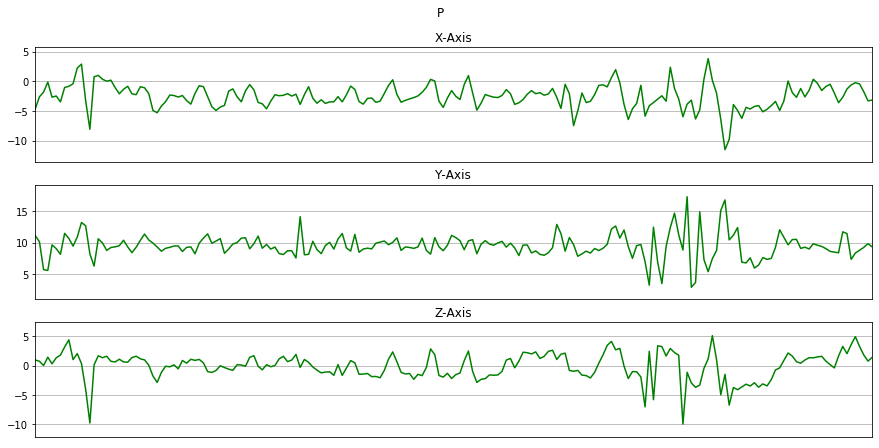

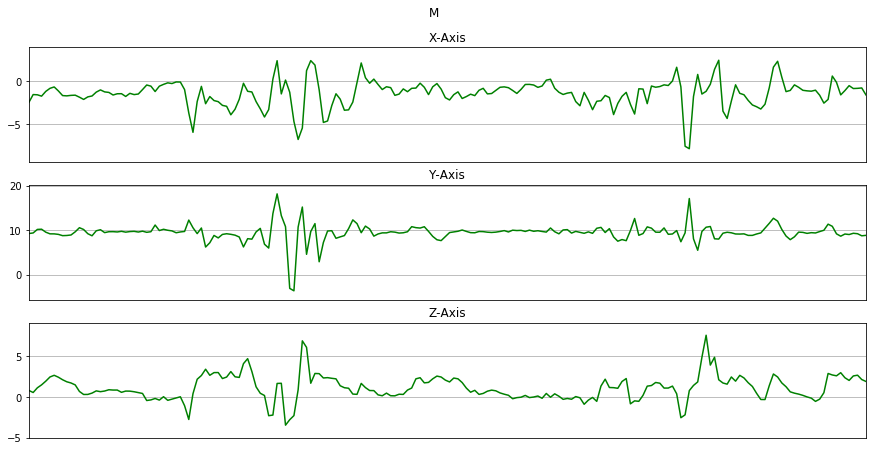

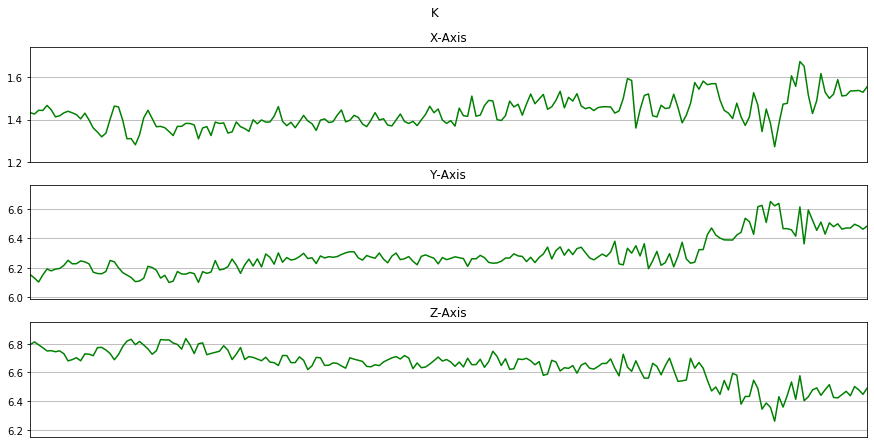

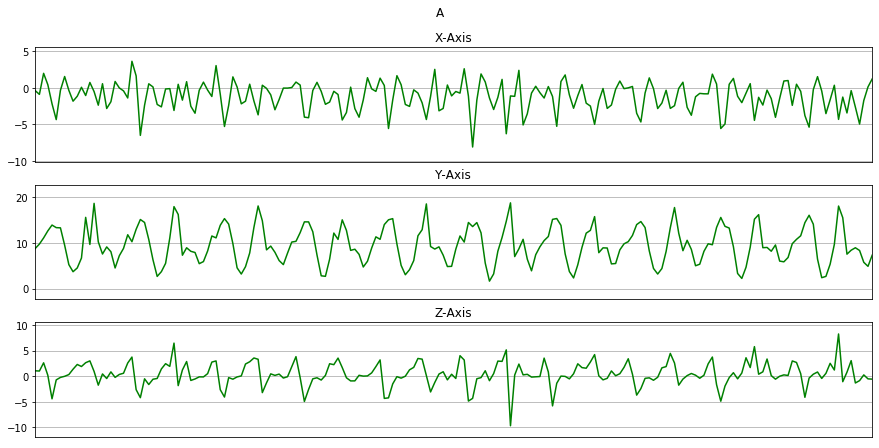

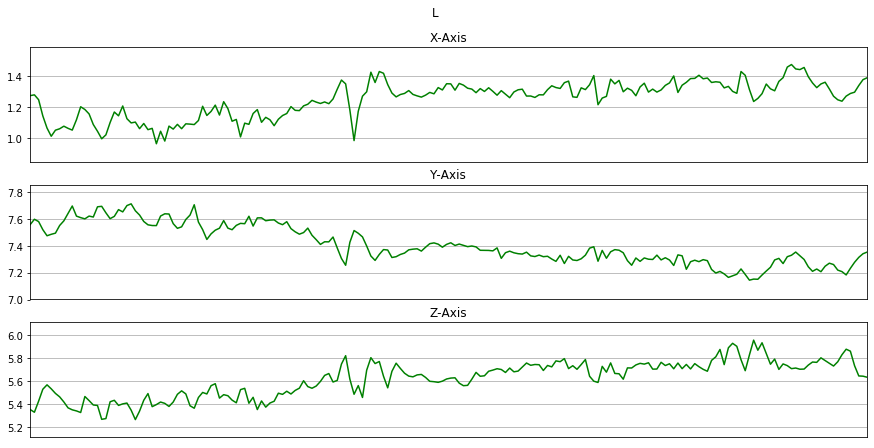

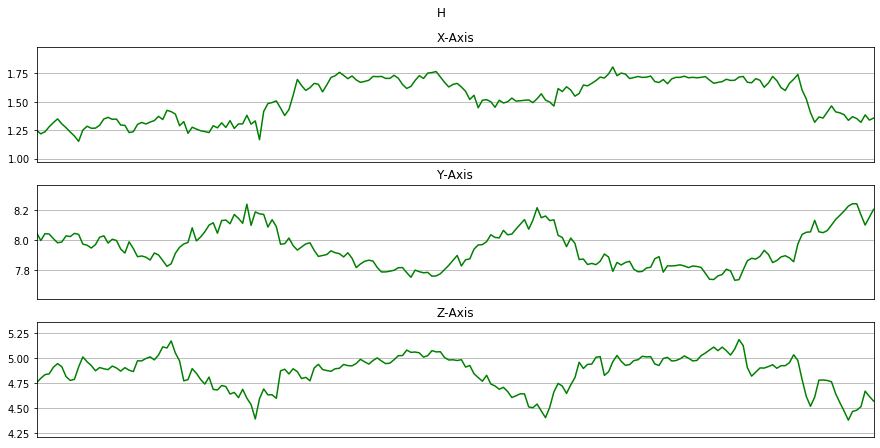

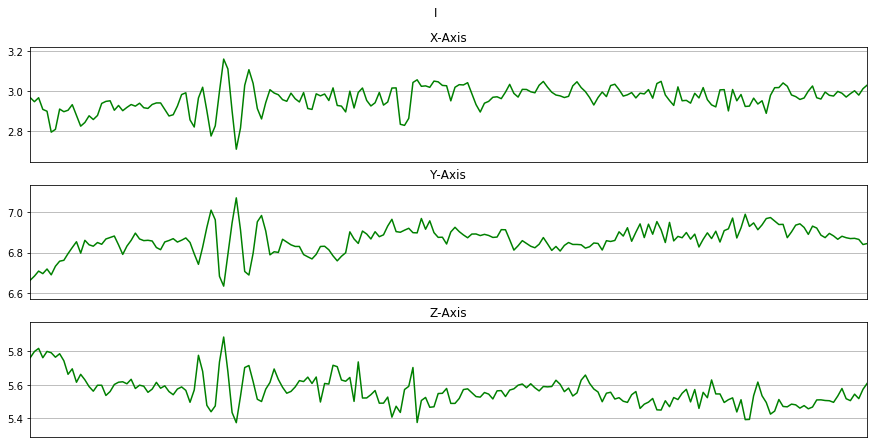

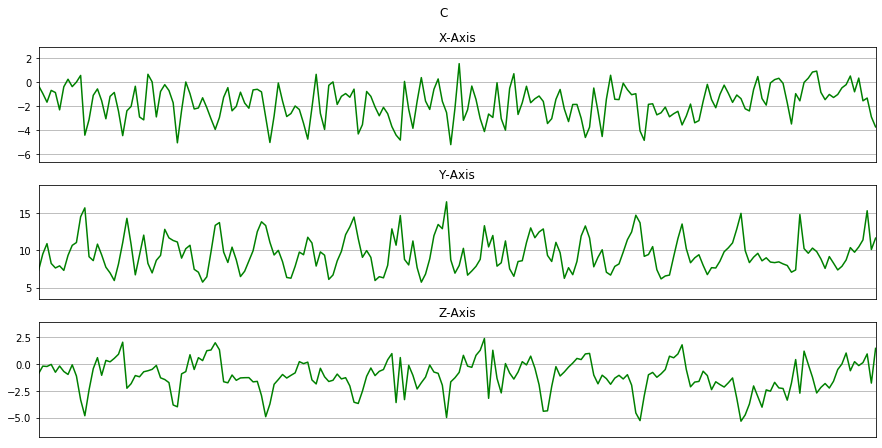

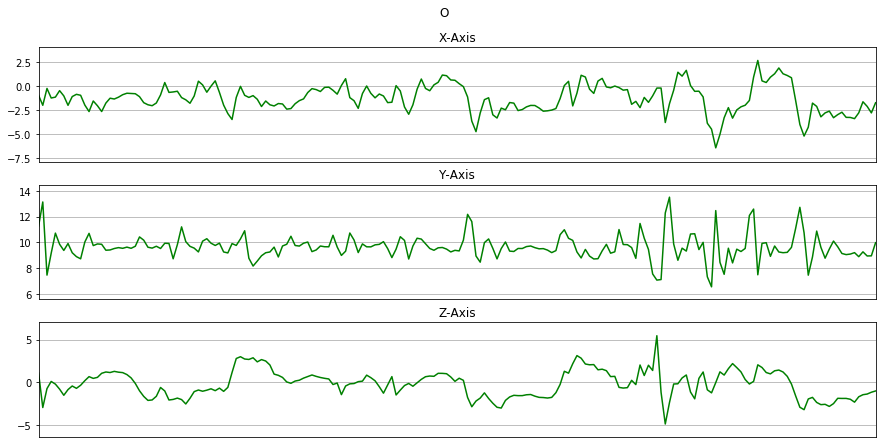

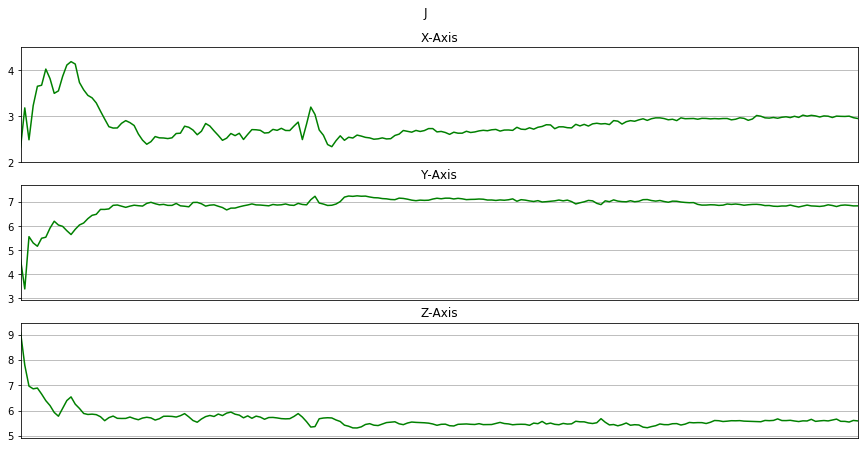

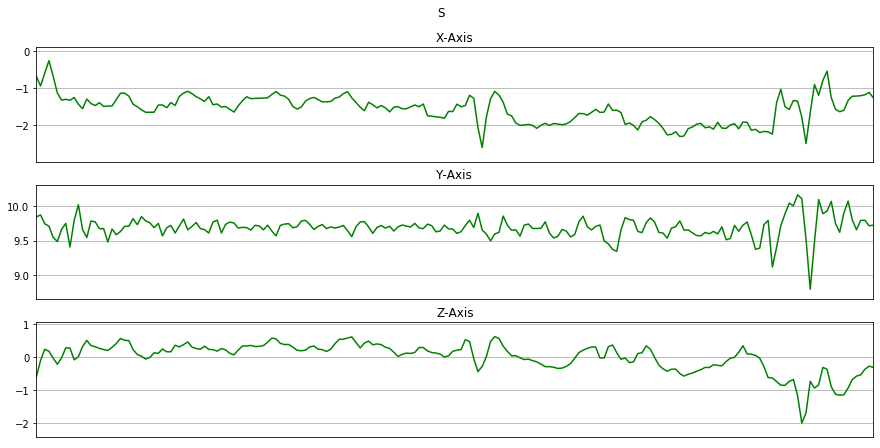

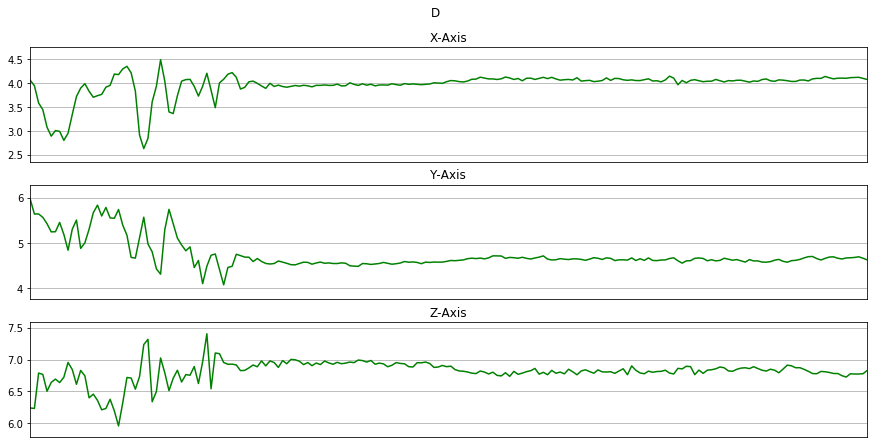

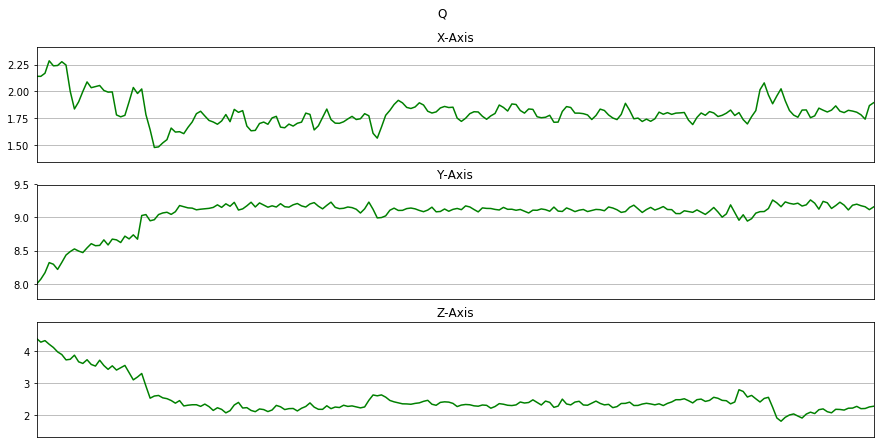

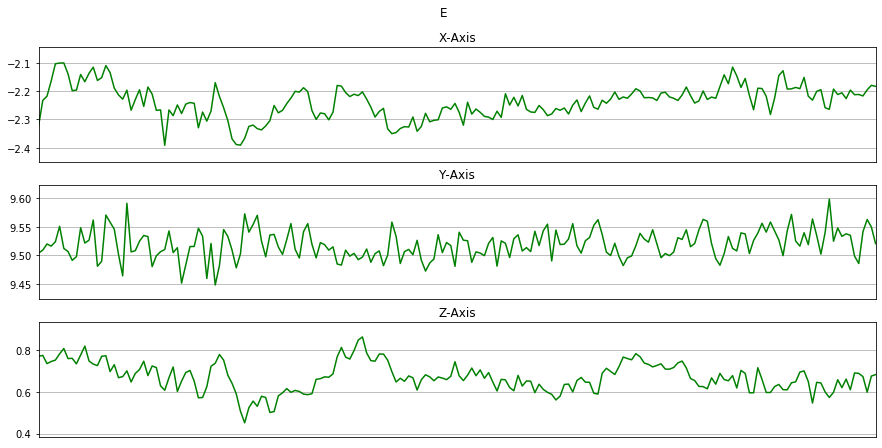

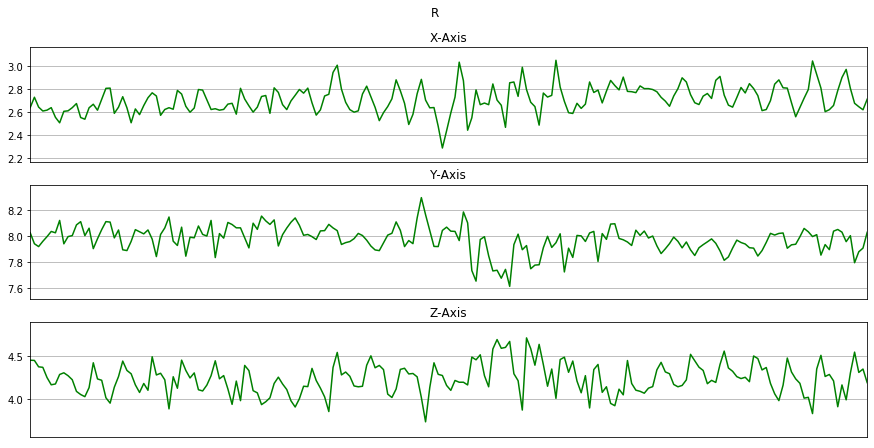

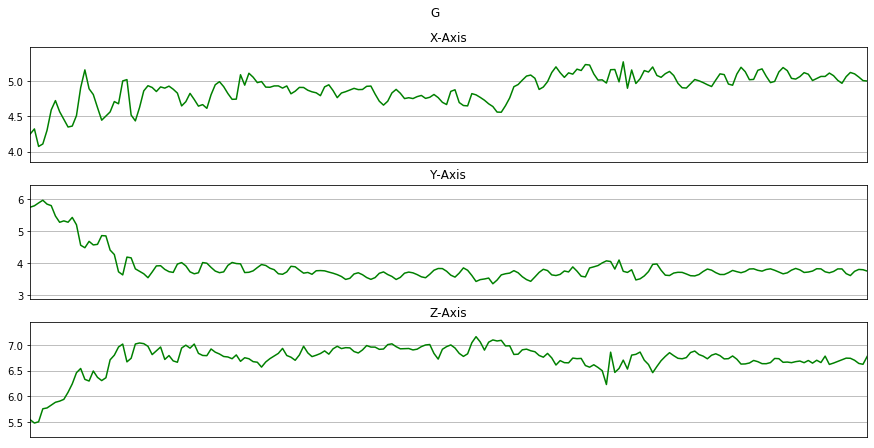

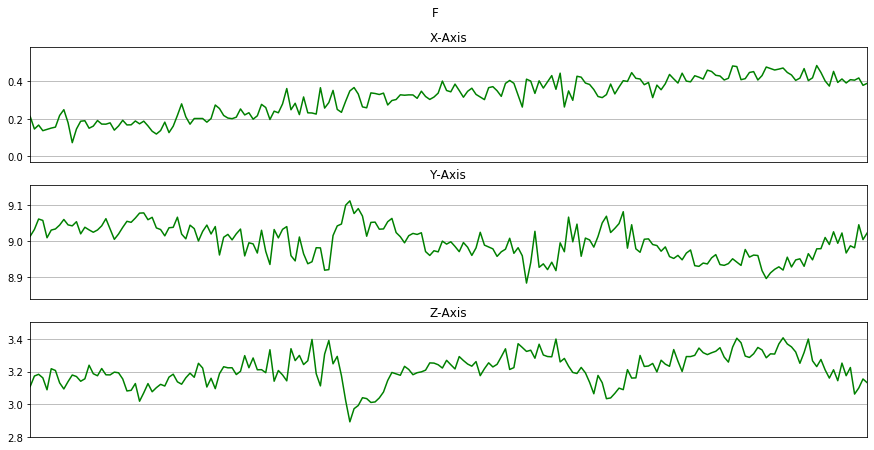

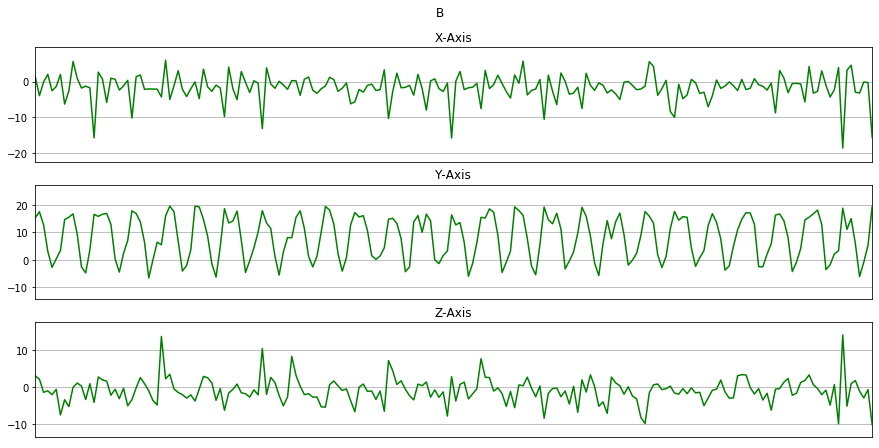

In [14]:
def plot_activity(Activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize=(15, 7), sharex = True)
    plot_axis(ax0, data['Time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(Activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax, x, y, title):
    ax.plot(x,y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y)+np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activity in activities:
    data_for_plot = data[(data['Activity']== Activity)][:Fs*10] #Selected 10 Seconds for clear representation
    plot_activity(Activity, data_for_plot)
    
     

In [12]:
df = data.drop(['User', 'Time'], axis = 1).copy()

In [13]:
df

,Activity,x,y,z
0,A,-0.364761,8.793503,1.055084
1,A,-0.879730,9.768784,1.016998
2,A,2.001495,11.109070,2.619156
3,A,0.450623,12.651642,0.184555
4,A,-2.164352,13.928436,-4.422485
5,A,-4.332779,13.361191,-0.718872
6,A,-0.319443,13.318359,-0.232025
7,A,1.566452,9.515274,-0.017776
8,A,-0.323746,5.262665,0.322342
9,A,-1.811676,3.710510,1.373932


In [17]:
df['Activity'].value_counts()

P    326432
M    322790
K    319861
A    316410
L    316264
H    315551
I    312049
C    310189
O    309299
J    307813
S    306874
D    305053
Q    305052
E    304954
R    304814
G    304798
F    297731
B    289076
Name: Activity, dtype: int64

In [14]:
#Balancing the data according the least number that is B

P = df[df['Activity']=='P'].head(289076).copy()
M = df[df['Activity']=='M'].head(289076).copy()
K = df[df['Activity']=='K'].head(289076).copy()
A = df[df['Activity']=='A'].head(289076).copy()
L = df[df['Activity']=='L'].head(289076).copy()
H = df[df['Activity']=='H'].head(289076).copy()
I = df[df['Activity']=='I'].head(289076).copy()
C = df[df['Activity']=='C'].head(289076).copy()
O = df[df['Activity']=='O'].head(289076).copy()
J = df[df['Activity']=='J'].head(289076).copy()
S = df[df['Activity']=='S'].head(289076).copy()
D = df[df['Activity']=='D'].head(289076).copy()
Q = df[df['Activity']=='Q'].head(289076).copy()
E = df[df['Activity']=='E'].head(289076).copy()
R = df[df['Activity']=='R'].head(289076).copy()
G = df[df['Activity']=='G'].head(289076).copy()
F = df[df['Activity']=='F'].head(289076).copy()
B = df[df['Activity']=='B'].copy()

In [15]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([P, M, K, A, L, H, I, C, O, J, S, D, Q, E, R, G, F, B])
balanced_data

,Activity,x,y,z
50019,P,-4.678116,11.097717,0.963730
50020,P,-2.622238,10.151032,0.748795
50021,P,-1.811890,5.713150,0.021667
50022,P,-0.140610,5.596024,1.449112
50023,P,-2.672318,9.638031,0.311691
50024,P,-2.486862,9.047913,1.331253
50025,P,-3.466019,8.155746,1.800034
50026,P,-1.037643,11.466965,3.189514
50027,P,-0.844955,10.667114,4.405807
50028,P,-0.418381,9.448868,1.036881


In [16]:
balanced_data['Activity'].value_counts()

M    289076
E    289076
R    289076
A    289076
C    289076
I    289076
O    289076
H    289076
L    289076
D    289076
J    289076
Q    289076
K    289076
P    289076
S    289076
B    289076
F    289076
G    289076
Name: Activity, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label = LabelEncoder()
balanced_data['label']= label.fit_transform(balanced_data['Activity'])
balanced_data

,Activity,x,y,z,label
50019,P,-4.678116,11.097717,0.963730,14
50020,P,-2.622238,10.151032,0.748795,14
50021,P,-1.811890,5.713150,0.021667,14
50022,P,-0.140610,5.596024,1.449112,14
50023,P,-2.672318,9.638031,0.311691,14
50024,P,-2.486862,9.047913,1.331253,14
50025,P,-3.466019,8.155746,1.800034,14
50026,P,-1.037643,11.466965,3.189514,14
50027,P,-0.844955,10.667114,4.405807,14
50028,P,-0.418381,9.448868,1.036881,14


In [73]:
label.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype=object)

In [19]:
##sTANDARDIZED DATA

X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']


In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values
scaled_X

,x,y,z,label
0,-1.060526,2.271973,-0.077055,14
1,-0.619624,2.091842,-0.131517,14
2,-0.445837,1.247422,-0.315762,14
3,-0.087416,1.225136,0.045935,14
4,-0.630364,1.994231,-0.242273,14
5,-0.590591,1.881946,0.016071,14
6,-0.800580,1.712188,0.134855,14
7,-0.279793,2.342232,0.486932,14
8,-0.238470,2.190040,0.795126,14
9,-0.146987,1.958238,-0.058519,14


In [21]:
##Frame Preparation

import scipy.stats as stats


In [22]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2



In [23]:
def get_frames(df, frame_size, hop_size):
    N_FEATURES = 3
    
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        #Retrieve the most often used label in this segment
        
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)
        
    #Bring segments into better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [24]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [25]:
X.shape, y.shape

((130083, 80, 3), (130083,))

In [26]:
## Test data processing

test_processedlist = []

# Phone Accel Data (TEST DATA)

for m in range(1,15,1):
    b_test = 1619+m
    test_filem = open('raw/test/phone/accel/data_'+str(b_test)+'_accel_phone.txt')
    test_linesm = test_filem.readlines()
    for test_am, test_linem in enumerate(test_linesm):
        try:
            test_linem = test_linem.split(',')
            test_lastm = test_linem[5].split(';')[0]
            test_lastm = test_lastm.strip()
            if test_lastm == '':
                break;
            test_tempm = [test_linem[0], test_linem[1], test_linem[2], test_linem[3], test_linem[4], test_lastm]
            test_processedlist.append(test_tempm)
        except:
            print("Error at line number: ", test_am)


In [27]:
# Phone Gyro Data (TEST DATA)

for m in range(1,15,1):
    b_test2 = 1619+m
    test2_filem = open('raw/test/phone/gyro/data_'+str(b_test2)+'_gyro_phone.txt')
    test2_linesm = test2_filem.readlines()
    for test2_am, test2_linem in enumerate(test2_linesm):
        try:
            test2_linem = test2_linem.split(',')
            test2_lastm = test2_linem[5].split(';')[0]
            test2_lastm = test2_lastm.strip()
            if test2_lastm == '':
                break;
            test2_tempm = [test2_linem[0], test2_linem[1], test2_linem[2], test2_linem[3], test2_linem[4], test2_lastm]
            test_processedlist.append(test2_tempm)
        except:
            print("Error at line number: ", test2_am)


In [28]:
# Watch accel Data (TEST DATA)

for m in range(1,15,1):
    b_test3 = 1619+m
    test3_filem = open('raw/test/watch/accel/data_'+str(b_test3)+'_accel_watch.txt')
    test3_linesm = test3_filem.readlines()
    for test3_am, test3_linem in enumerate(test3_linesm):
        try:
            test3_linem = test3_linem.split(',')
            test3_lastm = test3_linem[5].split(';')[0]
            test3_lastm = test3_lastm.strip()
            if test3_lastm == '':
                break;
            test3_tempm = [test3_linem[0], test3_linem[1], test3_linem[2], test3_linem[3], test3_linem[4], test3_lastm]
            test_processedlist.append(test3_tempm)
        except:
            print("Error at line number: ", test3_am)

In [29]:
#watch gyro data (TEST DATA)

for m in range(1,15,1):
    b_test4 = 1619+m
    test4_filem = open('raw/test/watch/gyro/data_'+str(b_test4)+'_gyro_watch.txt')
    test4_linesm = test4_filem.readlines()
    for test4_am, test4_linem in enumerate(test4_linesm):
        try:
            test4_linem = test4_linem.split(',')
            test4_lastm = test4_linem[5].split(';')[0]
            test4_lastm = test4_lastm.strip()
            if test4_lastm == '':
                break;
            test4_tempm = [test4_linem[0], test4_linem[1], test4_linem[2], test4_linem[3], test4_linem[4], test4_lastm]
            test_processedlist.append(test4_tempm)
        except:
            print("Error at line number: ", test4_am)

In [5]:
test_processedlist

[['1620', 'A', '938034649865917', '6.130188', '5.92334', '-0.7918701'],
 ['1620', 'A', '938034700219921', '9.97998', '10.531952', '-2.9611511'],
 ['1620', 'A', '938034717004589', '7.2329865', '11.2117', '-0.7839813'],
 ['1620', 'A', '938034767358593', '6.0130005', '9.32933', '-1.0701752'],
 ['1620', 'A', '938034784143261', '5.5630646', '7.3433533', '-4.254425'],
 ['1620', 'A', '938034834497265', '4.4858704', '6.8003845', '-3.9319458'],
 ['1620', 'A', '938034884851269', '4.0446625', '6.117218', '-1.2940063'],
 ['1620', 'A', '938034935205273', '5.2595215', '7.045456', '-2.3944855'],
 ['1620', 'A', '938034985559277', '5.198105', '6.749298', '-1.9175415'],
 ['1620', 'A', '938035035913281', '3.3507385', '8.355515', '-3.3041077'],
 ['1620', 'A', '938035086267284', '3.7511902', '11.994522', '-3.6960754'],
 ['1620', 'A', '938035136621288', '3.5383606', '10.114059', '-1.687439'],
 ['1620', 'A', '938035186975292', '4.804016', '7.2594604', '-0.61299133'],
 ['1620', 'A', '938035237329296', '5.4113

In [30]:
columns2 = ['User', 'Activity', 'Time', 'x', 'y', 'z']
data2 = pd.DataFrame(data = test_processedlist, columns = columns2)

In [31]:
data2

,User,Activity,Time,x,y,z
0,1620,A,938034649865917,6.130188,5.92334,-0.7918701
1,1620,A,938034700219921,9.97998,10.531952,-2.9611511
2,1620,A,938034717004589,7.2329865,11.2117,-0.7839813
3,1620,A,938034767358593,6.0130005,9.32933,-1.0701752
4,1620,A,938034784143261,5.5630646,7.3433533,-4.254425
5,1620,A,938034834497265,4.4858704,6.8003845,-3.9319458
6,1620,A,938034884851269,4.0446625,6.117218,-1.2940063
7,1620,A,938034935205273,5.2595215,7.045456,-2.3944855
8,1620,A,938034985559277,5.198105,6.749298,-1.9175415
9,1620,A,938035035913281,3.3507385,8.355515,-3.3041077


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5264082 entries, 0 to 5264081
Data columns (total 6 columns):
User        object
Activity    object
Time        object
x           object
y           object
z           object
dtypes: object(6)
memory usage: 241.0+ MB


In [32]:
data2.isnull().sum()

User        0
Activity    0
Time        0
x           0
y           0
z           0
dtype: int64

In [33]:
data2['Activity'].value_counts()

E    315763
Q    308362
K    305321
D    300277
S    298819
G    298325
B    297849
R    296242
A    292731
I    288986
O    287373
F    287227
M    284978
H    282906
C    282238
L    279844
P    279486
J    277355
Name: Activity, dtype: int64

In [32]:
###converting x, y, and z into float type (TEST DATA)

data2['x'] = data2['x'].astype('float')
data2['y'] = data2['y'].astype('float')
data2['z'] = data2['z'].astype('float')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266331 entries, 0 to 4266330
Data columns (total 6 columns):
User        object
Activity    object
Time        object
x           float64
y           float64
z           float64
dtypes: float64(3), object(3)
memory usage: 195.3+ MB


In [30]:
Fs = 20

In [10]:
activities = data2['Activity'].value_counts().index

In [11]:
activities

Index(['E', 'K', 'Q', 'G', 'B', 'S', 'R', 'D', 'A', 'I', 'F', 'O', 'M', 'H',
       'C', 'L', 'P', 'J'],
      dtype='object')

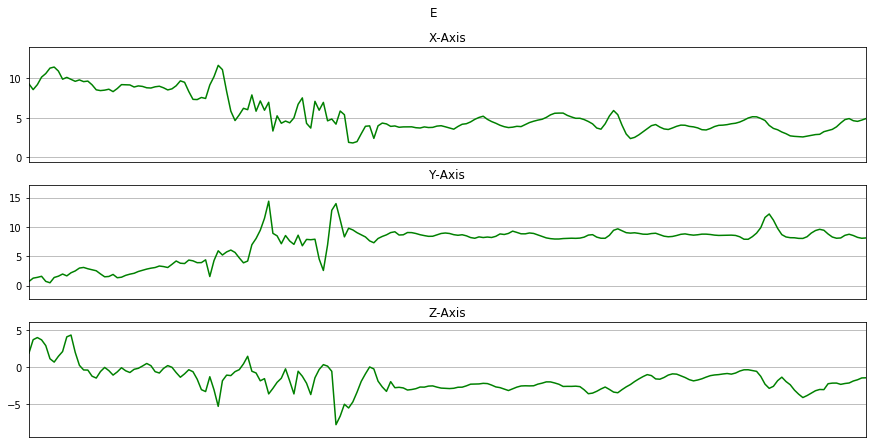

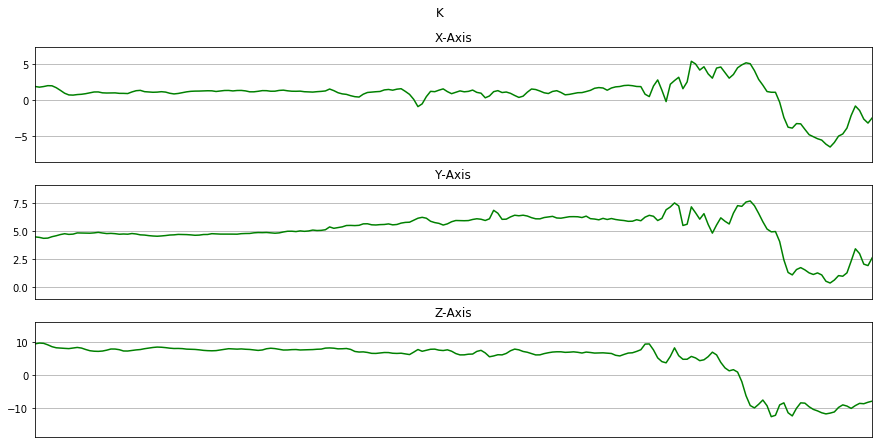

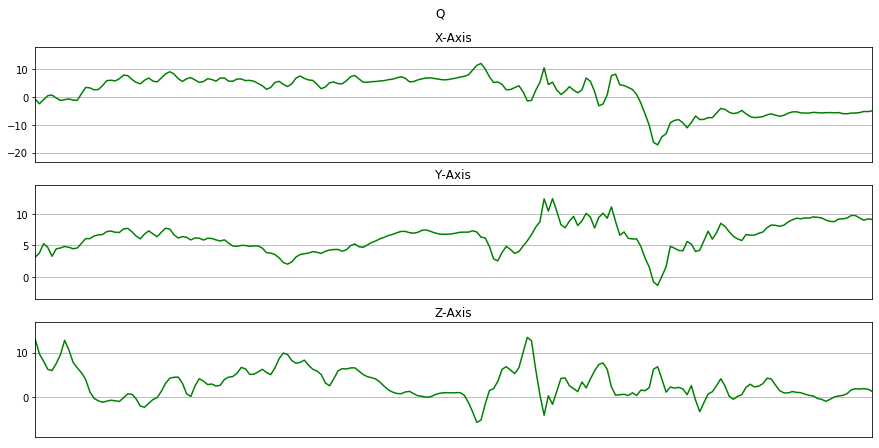

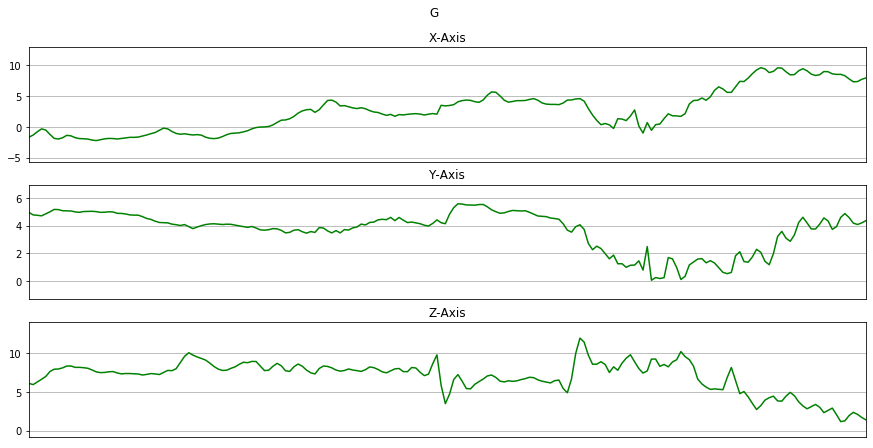

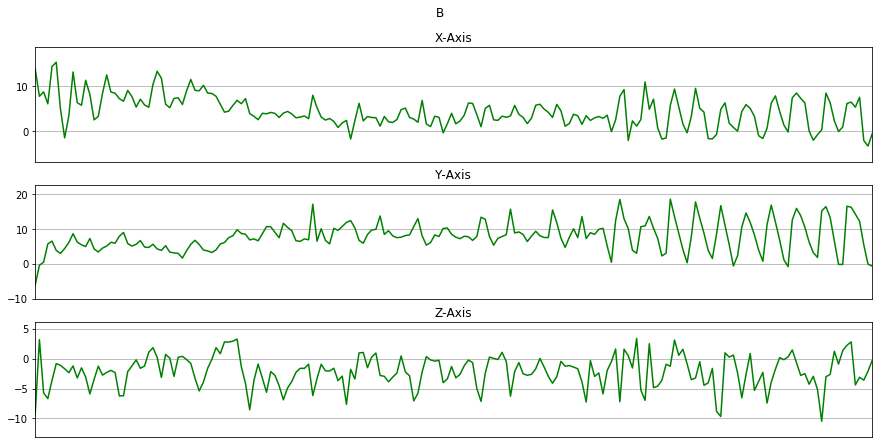

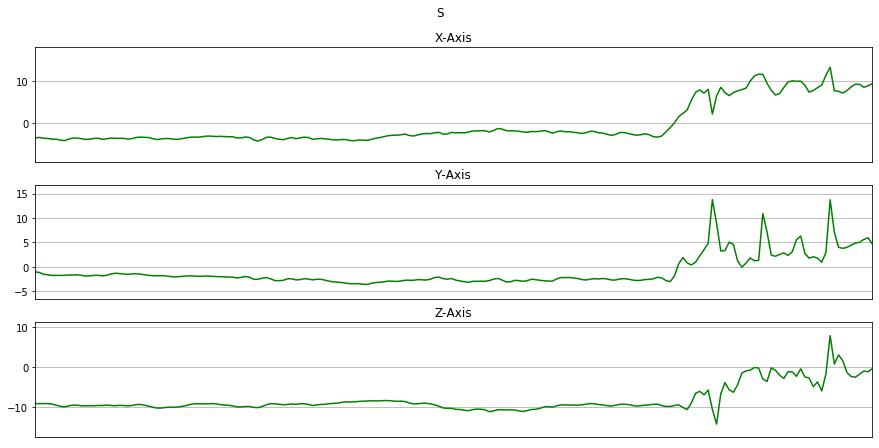

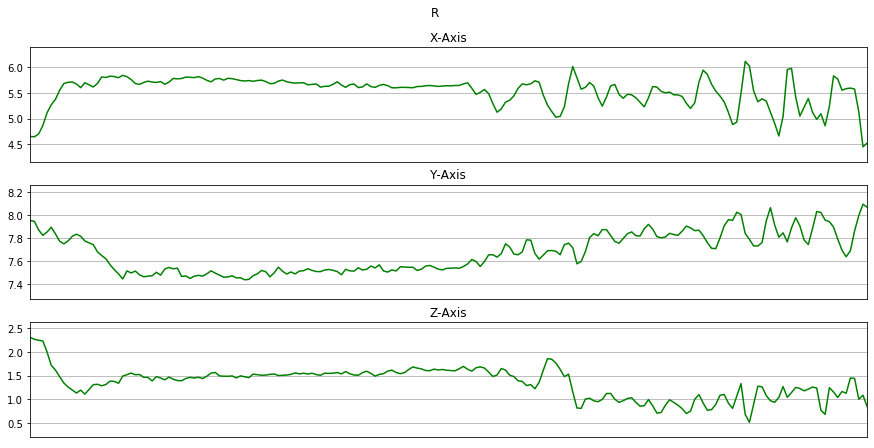

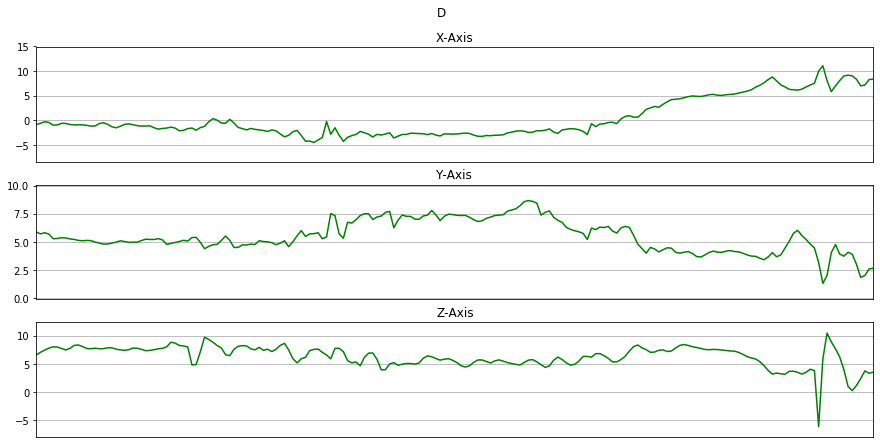

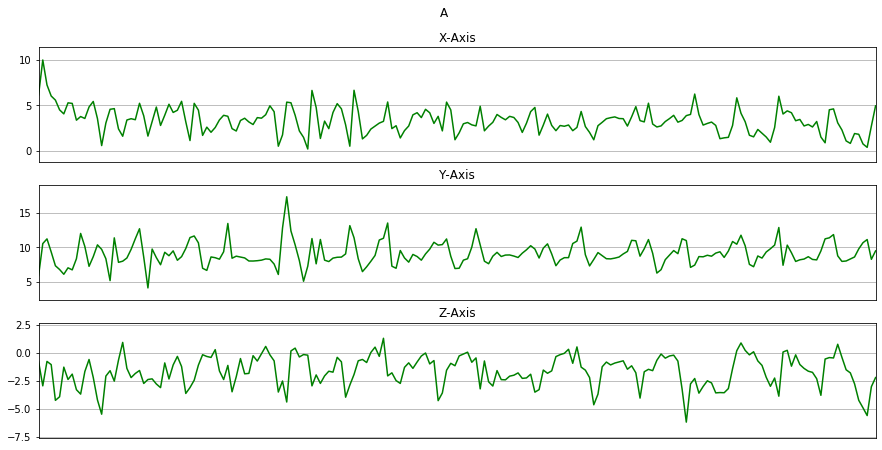

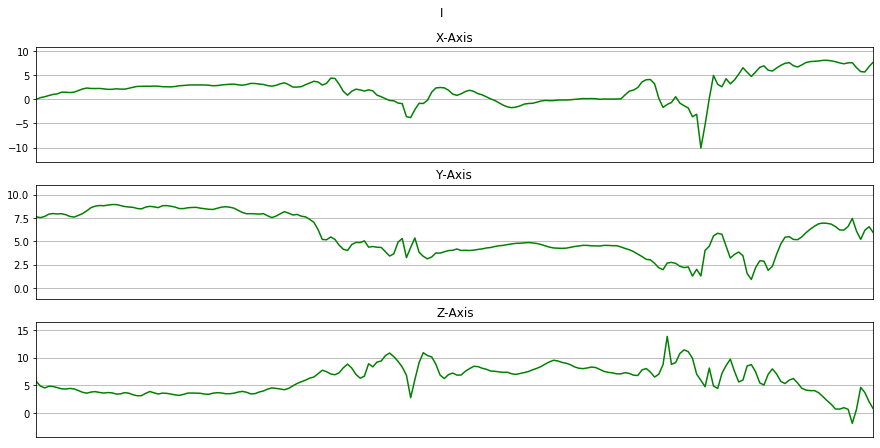

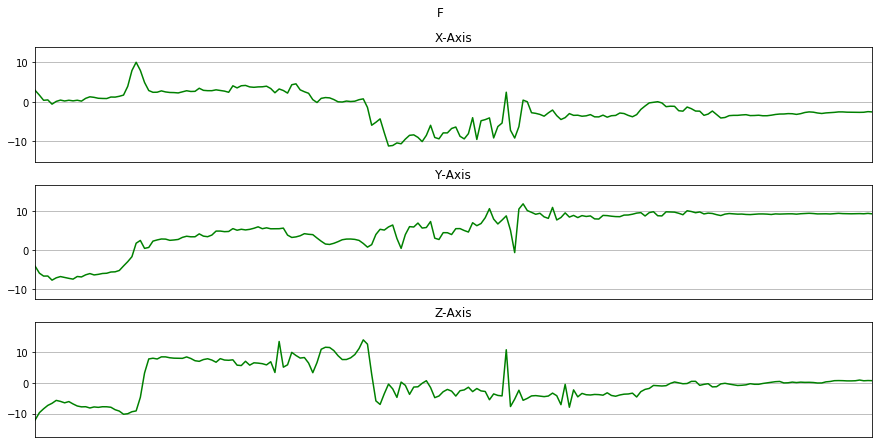

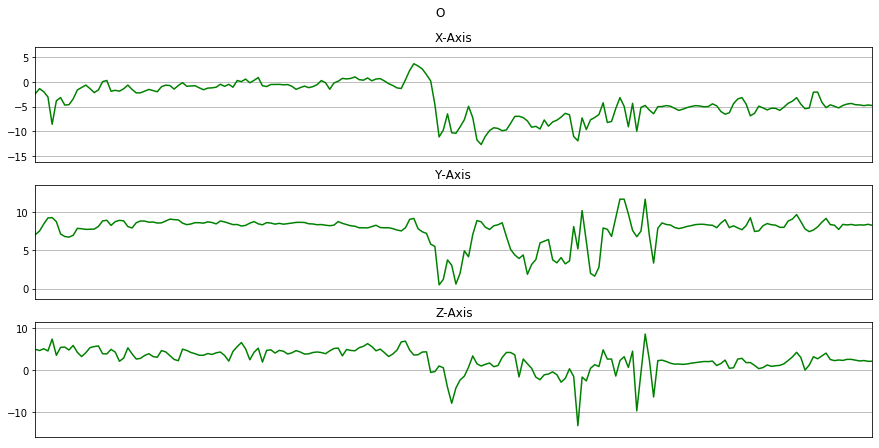

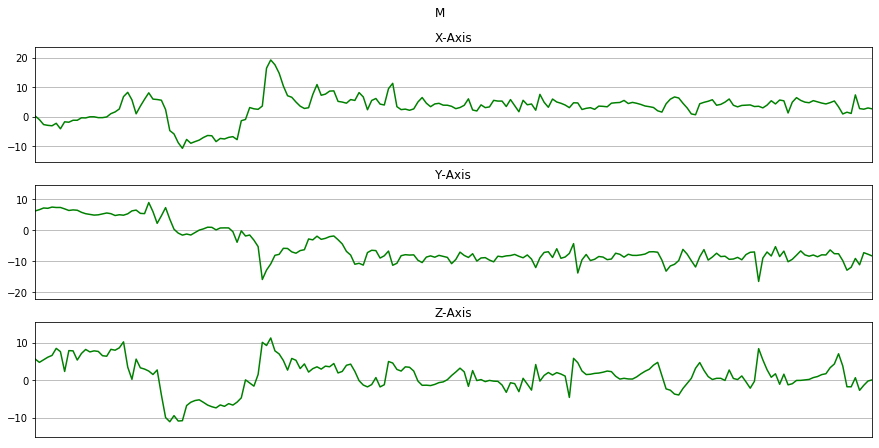

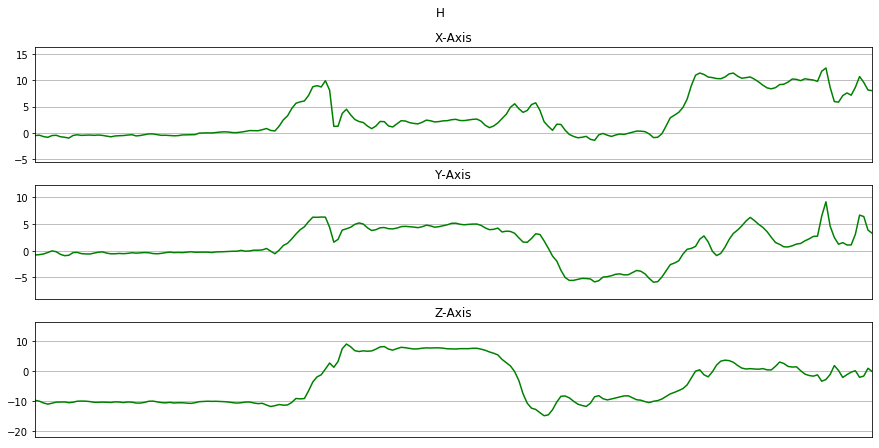

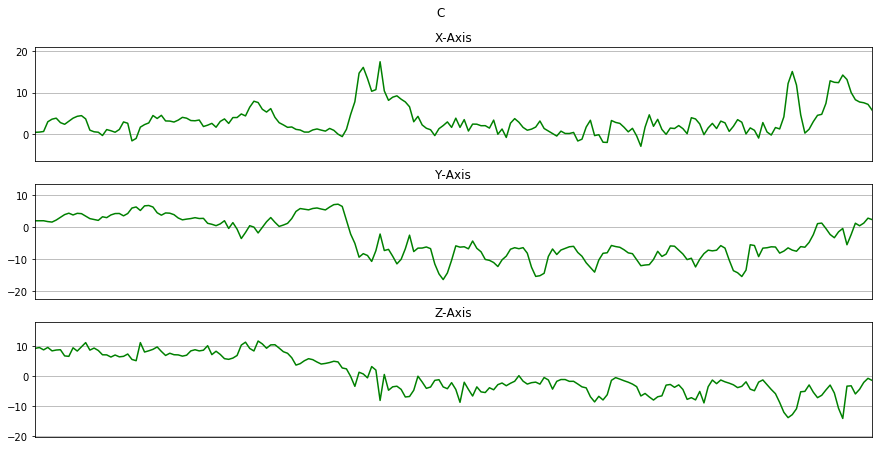

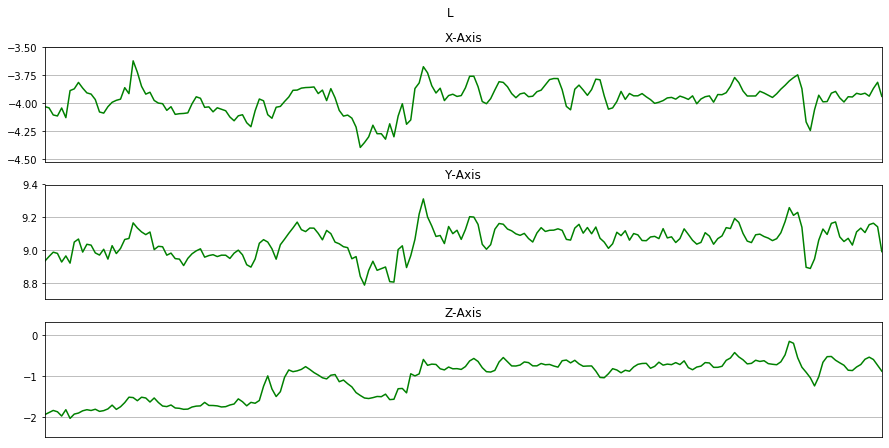

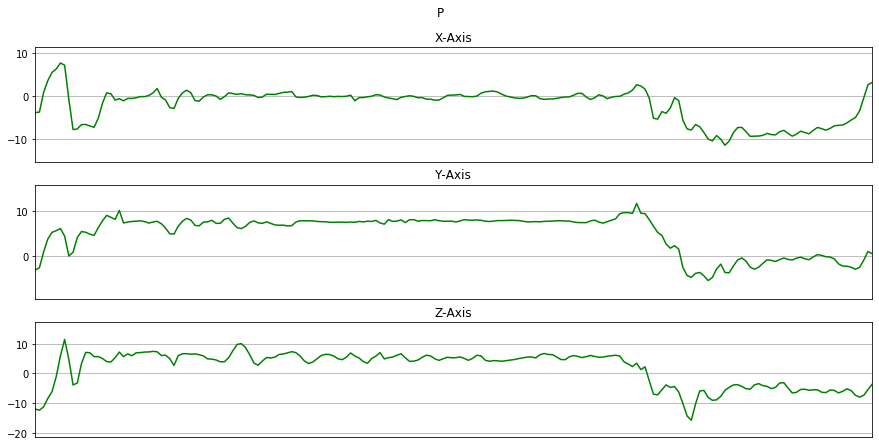

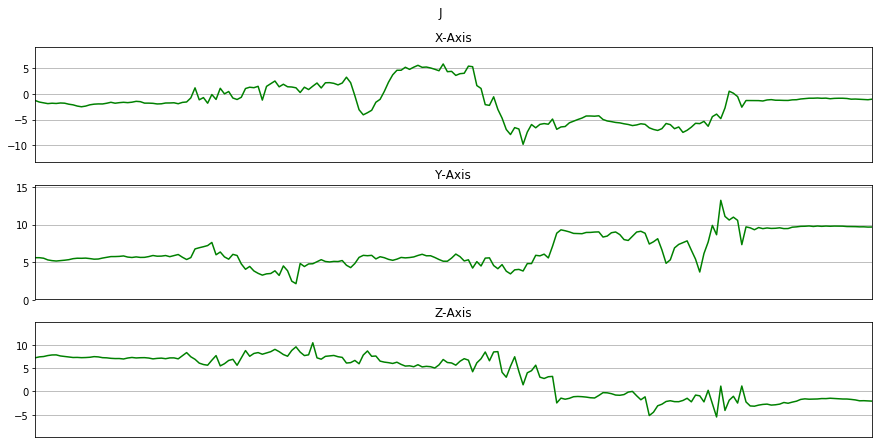

In [12]:
def plot_activity(Activity, data2):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize=(15, 7), sharex = True)
    plot_axis(ax0, data2['Time'], data2['x'], 'X-Axis')
    plot_axis(ax1, data2['Time'], data2['y'], 'Y-Axis')
    plot_axis(ax2, data2['Time'], data2['z'], 'Z-Axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(Activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax, x, y, title):
    ax.plot(x,y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y)+np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activity in activities:
    data_for_plot = data2[(data2['Activity']== Activity)][:Fs*10] #Selected 10 Seconds for clear representation
    plot_activity(Activity, data_for_plot)

In [33]:
df2 = data2.drop(['User', 'Time'], axis = 1).copy()

In [34]:
df2

,Activity,x,y,z
0,A,6.130188,5.923340,-0.791870
1,A,9.979980,10.531952,-2.961151
2,A,7.232986,11.211700,-0.783981
3,A,6.013001,9.329330,-1.070175
4,A,5.563065,7.343353,-4.254425
5,A,4.485870,6.800384,-3.931946
6,A,4.044663,6.117218,-1.294006
7,A,5.259521,7.045456,-2.394486
8,A,5.198105,6.749298,-1.917542
9,A,3.350738,8.355515,-3.304108


In [15]:
df2['Activity'].value_counts()

E    254010
K    248869
Q    247684
G    244279
B    243794
S    242737
R    242200
D    241924
A    238685
I    234942
F    233184
O    231527
M    230931
H    228832
C    228180
L    225801
P    225440
J    223312
Name: Activity, dtype: int64

In [35]:
#Balancing the data according the least number that is J

E = df2[df2['Activity']=='E'].head(223312).copy()
K = df2[df2['Activity']=='K'].head(223312).copy()
Q = df2[df2['Activity']=='Q'].head(223312).copy()
G = df2[df2['Activity']=='G'].head(223312).copy()
B = df2[df2['Activity']=='B'].head(223312).copy()
S = df2[df2['Activity']=='S'].head(223312).copy()
R = df2[df2['Activity']=='R'].head(223312).copy()
D = df2[df2['Activity']=='D'].head(223312).copy()
A = df2[df2['Activity']=='A'].head(223312).copy()
I = df2[df2['Activity']=='I'].head(223312).copy()
F = df2[df2['Activity']=='F'].head(223312).copy()
O = df2[df2['Activity']=='O'].head(223312).copy()
M = df2[df2['Activity']=='M'].head(223312).copy()
H = df2[df2['Activity']=='H'].head(223312).copy()
C = df2[df2['Activity']=='C'].head(223312).copy()
L = df2[df2['Activity']=='L'].head(223312).copy()
P = df2[df2['Activity']=='P'].head(223312).copy()
J = df2[df2['Activity']=='J'].copy()


In [36]:
balanced_testdata = pd.DataFrame()
balanced_testdata = balanced_testdata.append([E, K, Q, G, B, S, R, D, A, I, F, O, M, H, C, L, P, J])
balanced_testdata

,Activity,x,y,z
19703,E,9.291779,0.696426,1.910294
19704,E,8.566727,1.263794,3.725693
19705,E,9.196365,1.397247,4.016266
19706,E,10.151108,1.578094,3.704956
19707,E,10.604340,0.713791,2.925690
19708,E,11.292007,0.471863,1.149429
19709,E,11.426559,1.377823,0.696487
19710,E,10.917145,1.597671,1.478180
19711,E,9.886597,1.964142,2.125580
19712,E,10.116180,1.649933,4.110809


In [37]:
balanced_testdata['Activity'].value_counts()

M    223312
E    223312
R    223312
A    223312
C    223312
I    223312
O    223312
H    223312
L    223312
D    223312
J    223312
Q    223312
K    223312
P    223312
S    223312
B    223312
F    223312
G    223312
Name: Activity, dtype: int64

In [38]:
label2 = LabelEncoder()
balanced_testdata['label']= label2.fit_transform(balanced_testdata['Activity'])
balanced_testdata

,Activity,x,y,z,label
19703,E,9.291779,0.696426,1.910294,4
19704,E,8.566727,1.263794,3.725693,4
19705,E,9.196365,1.397247,4.016266,4
19706,E,10.151108,1.578094,3.704956,4
19707,E,10.604340,0.713791,2.925690,4
19708,E,11.292007,0.471863,1.149429,4
19709,E,11.426559,1.377823,0.696487,4
19710,E,10.917145,1.597671,1.478180,4
19711,E,9.886597,1.964142,2.125580,4
19712,E,10.116180,1.649933,4.110809,4


In [72]:
label2.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype=object)

In [39]:
##sTANDARDIZED DATA (TEST)

X_test = balanced_testdata[['x', 'y', 'z']]
y_test = balanced_testdata['label']

In [40]:
scaler2 = StandardScaler()
X_test = scaler2.fit_transform(X_test)
scaled_Xtest = pd.DataFrame(data = X_test, columns = ['x', 'y', 'z'])
scaled_Xtest['label'] = y_test.values
scaled_Xtest

,x,y,z,label
0,1.976579,0.444528,0.435406,4
1,1.819376,0.553987,0.898560,4
2,1.955892,0.579734,0.972693,4
3,2.162895,0.614623,0.893270,4
4,2.261163,0.447878,0.694459,4
5,2.410260,0.401205,0.241290,4
6,2.439433,0.575986,0.125733,4
7,2.328984,0.618400,0.325163,4
8,2.105545,0.689101,0.490331,4
9,2.155322,0.628483,0.996813,4


In [41]:
#Frame preparation (TEST)

Fs = 20
frame_size = Fs*4
hop_size = Fs*2



In [42]:
def get_frames(df2, frame_size, hop_size):
    N_FEATURES = 3
    
    frames = []
    labels = []
    for i in range(0, len(df2) - frame_size, hop_size):
        x = df2['x'].values[i: i + frame_size]
        y = df2['y'].values[i: i + frame_size]
        z = df2['z'].values[i: i + frame_size]
        
        #Retrieve the most often used label in this segment
        
        label = stats.mode(df2['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)
        
    #Bring segments into better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [43]:
X_test, y_test = get_frames(scaled_Xtest, frame_size, hop_size)

In [44]:
X_test.shape, y_test.shape

((100489, 80, 3), (100489,))

In [45]:
X.shape, y.shape

((130083, 80, 3), (130083,))

In [46]:
X[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [47]:
X = X.reshape(130083, 80, 3, 1)
X_test = X_test.reshape(100489, 80, 3, 1)

In [48]:
X[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [55]:
#2D CNN MODEL

model = Sequential()
model.add(Conv2D(16,(2,2), activation = 'relu', input_shape = X[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(18, activation = 'softmax'))


In [56]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [59]:
history = model.fit(X, y, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Train on 130083 samples, validate on 100489 samples
Epoch 1/10
130083/130083 [==============================] - 57s 437us/sample - loss: 1.6123 - accuracy: 0.4218 - val_loss: 2.2707 - val_accuracy: 0.3256
Epoch 2/10
130083/130083 [==============================] - 56s 432us/sample - loss: 1.6142 - accuracy: 0.4230 - val_loss: 2.3449 - val_accuracy: 0.3218
Epoch 3/10
130083/130083 [==============================] - 57s 437us/sample - loss: 1.6072 - accuracy: 0.4241 - val_loss: 2.3677 - val_accuracy: 0.3267
Epoch 4/10
130083/130083 [==============================] - 57s 438us/sample - loss: 1.6085 - accuracy: 0.4238 - val_loss: 2.3303 - val_accuracy: 0.3294
Epoch 5/10
130083/130083 [==============================] - 59s 451us/sample - loss: 1.6060 - accuracy: 0.4264 - val_loss: 2.2943 - val_accuracy: 0.3301
Epoch 6/10
130083/130083 [==============================] - 57s 440us/sample - loss: 1.6071 - accuracy: 0.4257 - val_loss: 2.3817 - val_accuracy: 0.3260
Epoch 7/10
130083/130083 [====

In [64]:
def plot_learningCurve(history, epochs):
    #Plot training and validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()
    
    #Plot training and validation loss values
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()
    
    
    

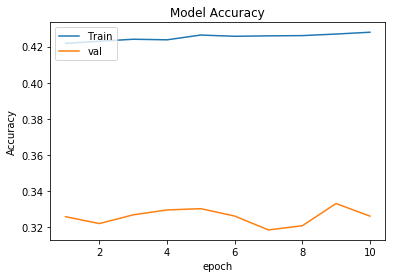

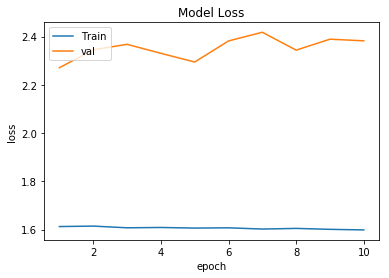

In [66]:
plot_learningCurve(history, 10)

In [68]:
## CONFUSION MATRIX

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [69]:
y_pred = model.predict_classes(X_test)

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efad400d30>)

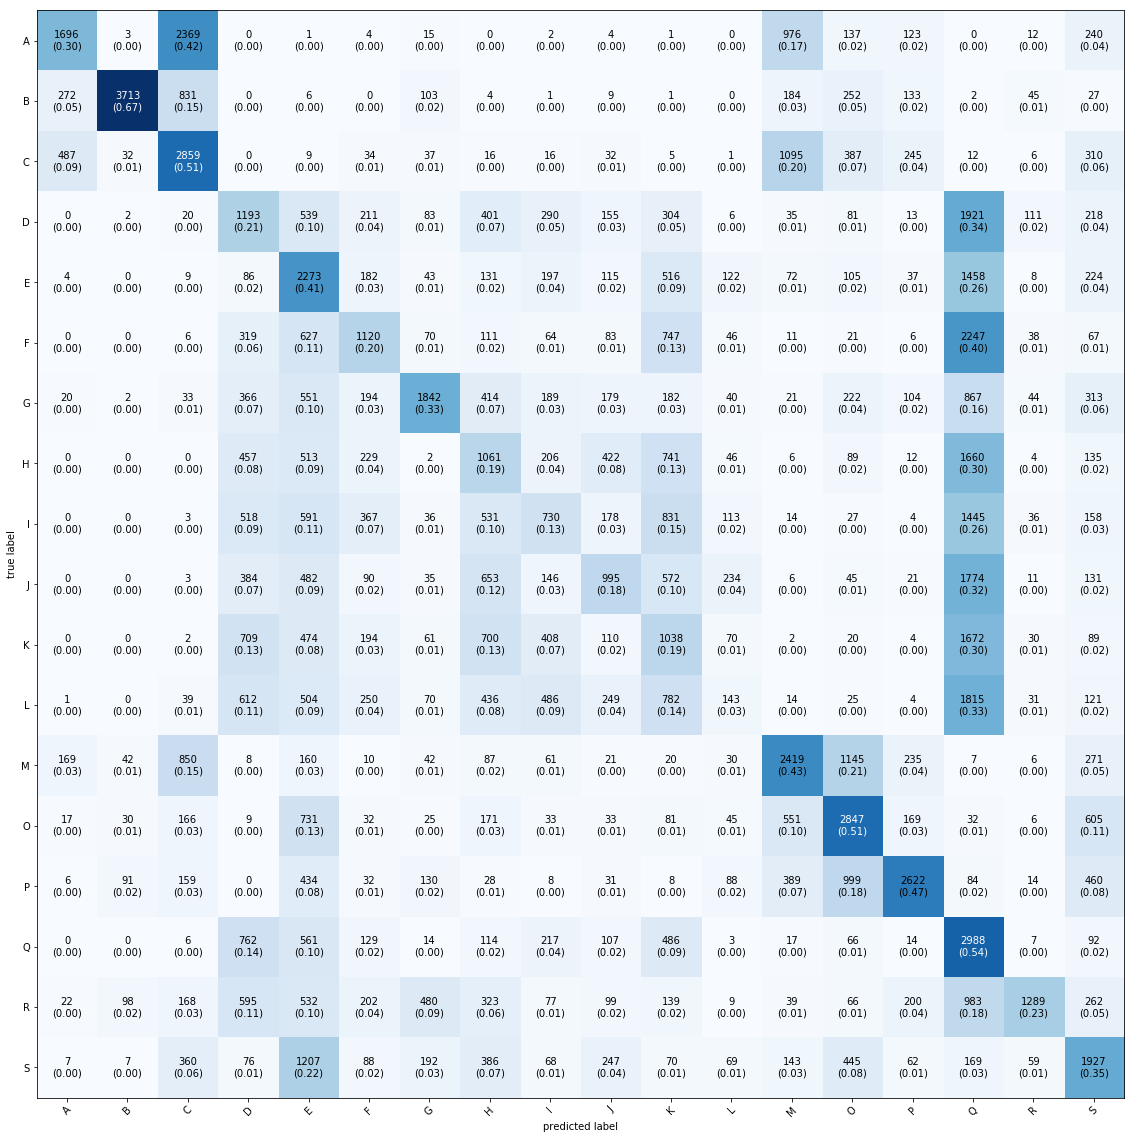

In [76]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label2.classes_,show_normed = True, figsize= (20,20))